In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing Tasks

### Loading all datasets

In [7]:
cases_test = pd.read_csv('./datasets/cases_2021_test.csv', parse_dates=[7])
cases_location = pd.read_csv('./datasets/location_2021.csv')

## 1.1 Cleaning messy outcome labels
Datasets involved: cases_2021_train.csv

In [8]:
cases_train = pd.read_csv('./datasets/cases_2021_train.csv', parse_dates=[7])

In [9]:
cases_train.groupby('outcome').size()

outcome
Alive                     25
Dead                       1
Death                      1
Deceased                 581
Died                       1
Hospitalized           24519
Receiving Treatment       24
Recovered              11364
Stable                     1
Under treatment           45
death                      6
died                     111
discharge                 28
discharged                16
recovered                425
stable                    21
stable condition          22
dtype: int64

In [10]:
# labels_test = {
#     'hospitalized': {'Discharged', 'Discharged from hospital', 'Hospitalized', 'critical condition','discharge', 'discharged'},
#     'nonhospitalized': {'Alive', 'Receiving Treatment', 'Stable', 'Under treatment', 'recovering at home 03.03.2020', 'released from quarantine', 'stable', 'stable condition'},
#     'deceased': {'Dead', 'Death', 'Deceased', 'Died', 'death', 'died'},
#     'recovered': {'Recovered', 'recovered'}
# }

### Mapping similar outcomes

In [11]:
labels = {
    'Discharged': 'hospitalized', 'Discharged from hospital': 'hospitalized', 'Hospitalized': 'hospitalized', 'critical condition': 'hospitalized', 'discharge': 'hospitalized', 'discharged': 'hospitalized', 
    'Alive': 'nonhospitalized', 'Receiving Treatment': 'nonhospitalized', 'Stable': 'nonhospitalized', 'Under treatment': 'nonhospitalized', 'recovering at home 03.03.2020': 'nonhospitalized', 'released from quarantine': 'nonhospitalized', 'stable': 'nonhospitalized', 'stable condition': 'nonhospitalized', 
    'Dead': 'deceased', 'Death': 'deceased', 'Deceased': 'deceased', 'Died': 'deceased', 'death': 'deceased', 'died': 'deceased',
     'Recovered': 'recovered', 'recovered': 'recovered'
}

In [12]:
cases_train['outcome_group'] = cases_train['outcome'].map(labels)

In [13]:
cases_train

,age,sex,province,country,latitude,longitude,date_confirmation,additional_information,source,chronic_disease_binary,outcome,outcome_group
0,NaN,NaN,Maharashtra,India,19.20000,72.96667,23.05.2020,NaN,NaN,False,Hospitalized,hospitalized
1,NaN,NaN,Maharashtra,India,18.94017,72.83483,18.05.2020,NaN,https://t.me/indiacovid/5075,False,Recovered,recovered
2,NaN,NaN,Maharashtra,India,19.20000,72.96667,28.05.2020,NaN,https://phdmah.maps.arcgis.com/apps/opsdashboa...,False,Hospitalized,hospitalized
3,NaN,NaN,West Bengal,India,22.80862,88.79242,09.05.2020,NaN,https://www.wbhealth.gov.in/uploaded_files/cor...,False,Hospitalized,hospitalized
4,NaN,NaN,Maharashtra,India,18.94017,72.83483,17.05.2020,NaN,NaN,False,Hospitalized,hospitalized
...,...,...,...,...,...,...,...,...,...,...,...,...
37187,NaN,NaN,Maharashtra,India,18.94017,72.83483,28.05.2020,NaN,https://phdmah.maps.arcgis.com/apps/opsdashboa...,False,Hospitalized,hospitalized
37188,NaN,NaN,Madhya Pradesh,India,23.26466,77.40518,12.05.2020,NaN,https://twitter.com/ANI/status/126023457988702...,False,Recovered,recovered
37189,NaN,NaN,Maharashtra,India,18.94017,72.83483,29.05.2020,NaN,https://arogya.maharashtra.gov.in/pdf/ncovidep...,False,Recovered,recovered
37190,NaN,NaN,Madhya Pradesh,India,22.71622,75.86512,05.05.2020,NaN,https://twitter.com/JansamparkMP/status/125767...,False,Recovered,recovered


In [14]:
cases_train = cases_train.drop(columns=['outcome'])

In [15]:
cases_train

,age,sex,province,country,latitude,longitude,date_confirmation,additional_information,source,chronic_disease_binary,outcome_group
0,NaN,NaN,Maharashtra,India,19.20000,72.96667,23.05.2020,NaN,NaN,False,hospitalized
1,NaN,NaN,Maharashtra,India,18.94017,72.83483,18.05.2020,NaN,https://t.me/indiacovid/5075,False,recovered
2,NaN,NaN,Maharashtra,India,19.20000,72.96667,28.05.2020,NaN,https://phdmah.maps.arcgis.com/apps/opsdashboa...,False,hospitalized
3,NaN,NaN,West Bengal,India,22.80862,88.79242,09.05.2020,NaN,https://www.wbhealth.gov.in/uploaded_files/cor...,False,hospitalized
4,NaN,NaN,Maharashtra,India,18.94017,72.83483,17.05.2020,NaN,NaN,False,hospitalized
...,...,...,...,...,...,...,...,...,...,...,...
37187,NaN,NaN,Maharashtra,India,18.94017,72.83483,28.05.2020,NaN,https://phdmah.maps.arcgis.com/apps/opsdashboa...,False,hospitalized
37188,NaN,NaN,Madhya Pradesh,India,23.26466,77.40518,12.05.2020,NaN,https://twitter.com/ANI/status/126023457988702...,False,recovered
37189,NaN,NaN,Maharashtra,India,18.94017,72.83483,29.05.2020,NaN,https://arogya.maharashtra.gov.in/pdf/ncovidep...,False,recovered
37190,NaN,NaN,Madhya Pradesh,India,22.71622,75.86512,05.05.2020,NaN,https://twitter.com/JansamparkMP/status/125767...,False,recovered


In [16]:
cases_train.groupby('outcome_group').size()

outcome_group
deceased             701
hospitalized       24563
nonhospitalized      138
recovered          11789
dtype: int64

## 1.3 Exploratory Data Analysis 

Ideas to explore

Probably want to convert date_information to a datetime object 

Categorical Attributes: Province, Country, Chronic disease, outcome_group, Sex
Numerical: Age, Date
By: country, Age, Sex
Age range: 18 - 30, < 18, 60 >


### 1.3.1 train / test dataset

In [19]:
stats_cases_train = cases_train.describe(include='all')
stats_cases_train = stats_cases_train.append(pd.DataFrame([cases_train.isna().sum()], index=['null'])) # add count of null values
#stats_cases_train = stats_cases_train.iloc[[0,11,1]] # keep [count, null, unique]
stats_cases_train

,age,sex,province,country,latitude,longitude,date_confirmation,additional_information,source,chronic_disease_binary,outcome_group
count,4092,4492,37077,37192,37192.000000,37191.000000,37185,2173,33906,37191,37191
unique,109,2,101,34,NaN,NaN,121,995,1810,2,4
top,30,male,Maharashtra,India,NaN,NaN,29.05.2020,Reconciled from MOHFW Table,https://arogya.maharashtra.gov.in/pdf/ncovidep...,False,hospitalized
freq,159,2886,12850,36461,NaN,NaN,2462,116,1349,37180,24563
mean,NaN,NaN,NaN,NaN,21.082192,76.881877,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,5.399335,8.483122,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,-34.928900,-122.414900,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,18.940170,72.834830,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,19.683330,75.401360,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,25.153538,78.880240,NaN,NaN,NaN,NaN,NaN


In [20]:
stats_cases_test = cases_test.describe(include='all').round(2)
stats_cases_test = stats_cases_test.append(pd.DataFrame([cases_test.isna().sum()], index=['null'])) # add count of null values
#stats_cases_test = stats_cases_test.iloc[[0,11,1]] # keep [count, null, unique]
stats_cases_test

,age,sex,province,country,latitude,longitude,date_confirmation,additional_information,source,chronic_disease_binary,outcome_group
count,4566,5099,40519,40641,40641.00,40641.00,40629,2518,37033,40640,0.0
unique,108,2,111,36,NaN,NaN,117,1156,1873,2,NaN
top,30,male,Maharashtra,India,NaN,NaN,29.05.2020,Back-dated update,https://arogya.maharashtra.gov.in/pdf/ncovidep...,False,NaN
freq,163,3289,13989,39819,NaN,NaN,2683,141,1483,40620,NaN
mean,NaN,NaN,NaN,NaN,21.07,76.86,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,5.39,8.77,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,-27.47,-122.33,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,18.94,72.83,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,19.65,75.59,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,25.17,78.78,NaN,NaN,NaN,NaN,NaN


In [21]:
# age attribute

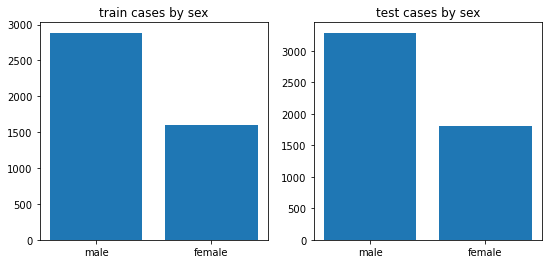

In [22]:
# sex attribute
plt.figure(figsize=(9,4))
plt.subplot(1,2,1)
plt.bar(cases_train['sex'].value_counts().index,cases_train['sex'].value_counts())
plt.title('train cases by sex')

plt.subplot(1,2,2)
plt.bar(cases_test['sex'].value_counts().index,cases_test['sex'].value_counts())
plt.title('test cases by sex')
plt.show()

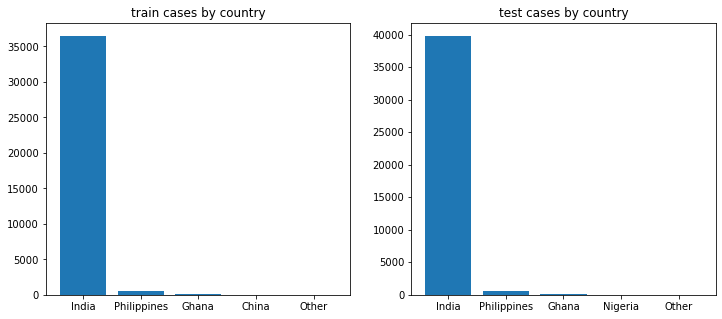

In [23]:
# country attribute
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
values = pd.DataFrame(cases_train['country'].value_counts()).reset_index()
values['index'] = values.apply(lambda x: x['index'] if x.country>25 else 'Other', axis=1)# sumarize others
plt.bar(values['index'], values['country'])
plt.title('train cases by country')

plt.subplot(1,2,2)
values = pd.DataFrame(cases_test['country'].value_counts()).reset_index()
values['index'] = values.apply(lambda x: x['index'] if x.country>25 else 'Other', axis=1)# sumarize others
plt.bar(values['index'], values['country'])
plt.title('test cases by country')
plt.show()

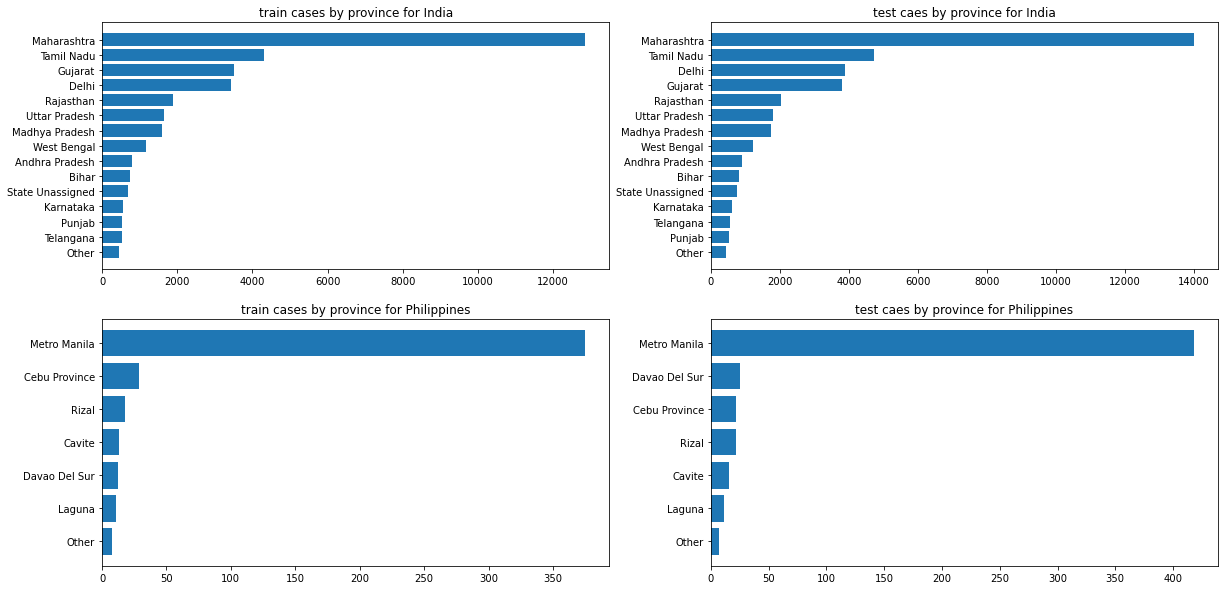

In [24]:
# province attribute
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
values = cases_train[cases_train['country']=='India']
values = pd.DataFrame(values['province'].value_counts().sort_values(ascending=True)).reset_index()
values['index'] = values.apply(lambda x: x['index'] if x.province>500 else 'Other', axis=1)#sumarize others
plt.barh(values['index'], values['province'])
plt.title('train cases by province for India')

plt.subplot(2,2,2)
values = cases_test[cases_test['country']=='India']
values = pd.DataFrame(values['province'].value_counts().sort_values(ascending=True)).reset_index()
values['index'] = values.apply(lambda x: x['index'] if x.province>500 else 'Other', axis=1)#sumarize others
plt.barh(values['index'], values['province'])
plt.title('test caes by province for India')

plt.subplot(2,2,3)
values = cases_train[cases_train['country']=='Philippines']
values = pd.DataFrame(values['province'].value_counts().sort_values(ascending=True)).reset_index()
values['index'] = values.apply(lambda x: x['index'] if x.province>10 else 'Other', axis=1)#sumarize others
plt.barh(values['index'], values['province'])
plt.title('train cases by province for Philippines')

plt.subplot(2,2,4)
values = cases_test[cases_test['country']=='Philippines']
values = pd.DataFrame(values['province'].value_counts().sort_values(ascending=True)).reset_index()
values['index'] = values.apply(lambda x: x['index'] if x.province>10 else 'Other', axis=1)#sumarize others
plt.barh(values['index'], values['province'])
plt.title('test caes by province for Philippines')

plt.show()

In [ ]:
# latitude / longitude

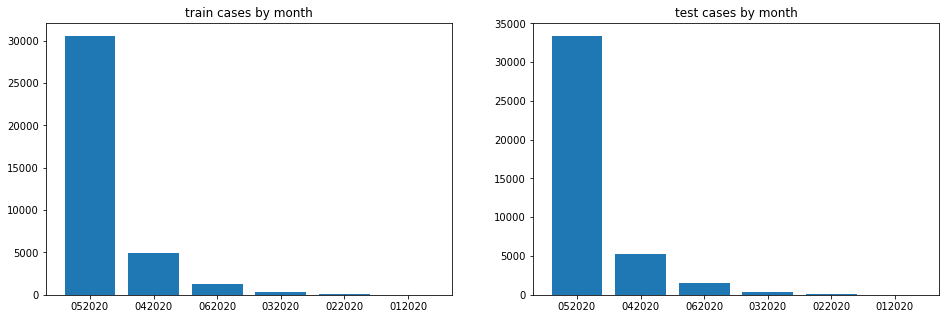

In [25]:
# date_confirmation attribute

# add month attribute
cases_train['month'] = cases_train.apply(lambda x: str(x.date_confirmation)[3:5] + str(x.date_confirmation)[6:10], axis=1)
cases_train = cases_train.replace("", np.NaN)
cases_test['month'] = cases_test.apply(lambda x: str(x.date_confirmation)[3:5] + str(x.date_confirmation)[6:10], axis=1)
cases_test = cases_test.replace("", np.NaN)


plt.figure(figsize=(16, 5))
plt.subplot(1,2,1)
plt.bar(cases_train['month'].value_counts().index, cases_train['month'].value_counts())
plt.title('train cases by month')

plt.subplot(1,2,2)
plt.bar(cases_test['month'].value_counts().index, cases_test['month'].value_counts())
plt.title('test cases by month')
plt.show()

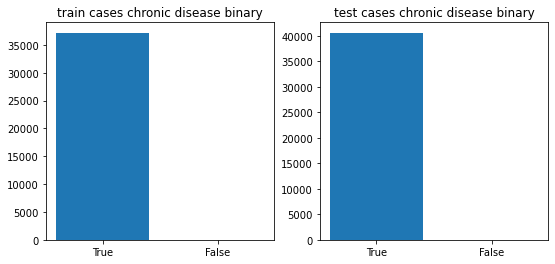

In [26]:
# chronic disease  attribute
plt.figure(figsize=(9,4))
plt.subplot(1,2,1)
plt.bar(['True','False'],cases_train['chronic_disease_binary'].value_counts())
plt.title('train cases chronic disease binary')

plt.subplot(1,2,2)
plt.bar(['True','False'],cases_test['chronic_disease_binary'].value_counts())
plt.title('test cases chronic disease binary')
plt.show()

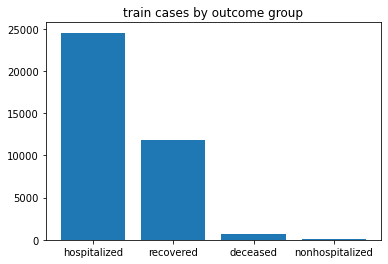

In [27]:
#outcome group attribute
plt.bar(cases_train['outcome_group'].value_counts().index,cases_train['outcome_group'].value_counts())
plt.title('train cases by outcome group')
plt.show()

### 1.3.2 location dataset

In [28]:
stats_cases_location = cases_location.describe(include="all").round(2)
stats_cases_location = stats_cases_location.append(pd.DataFrame([cases_location.isna().sum()], index=['null'])) # add count of null values
#stats_cases_location = stats_cases_location.iloc[[0,11,1, 4, 5, 6, 10]] # keep [count, null, unique]
stats_cases_location

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
count,3830,4004,4004,3915.00,3915.00,4004.00,4004.00,729.00,729.00,4004,3914.00,3956.00
unique,593,196,9,NaN,NaN,NaN,NaN,NaN,NaN,4004,NaN,NaN
top,Texas,US,2021-04-01 04:27:05,NaN,NaN,NaN,NaN,NaN,NaN,"Gilchrist, Florida, US",NaN,NaN
freq,255,3277,3989,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN
mean,NaN,NaN,NaN,35.82,-71.33,32300.36,726.71,100300.81,36416.57,NaN,8171.70,2.75
std,NaN,NaN,NaN,13.23,54.89,166884.39,4083.39,274010.22,218469.87,NaN,3915.61,42.19
min,NaN,NaN,NaN,-52.37,-178.12,0.00,0.00,0.00,0.00,NaN,0.00,0.00
25%,NaN,NaN,NaN,33.21,-96.59,1040.75,17.00,476.00,246.00,NaN,5931.16,1.20
50%,NaN,NaN,NaN,37.90,-86.76,2885.50,53.00,13740.00,2602.00,NaN,8754.61,1.78
75%,NaN,NaN,NaN,42.18,-77.39,11581.00,184.50,61640.00,19558.00,NaN,10706.94,2.51


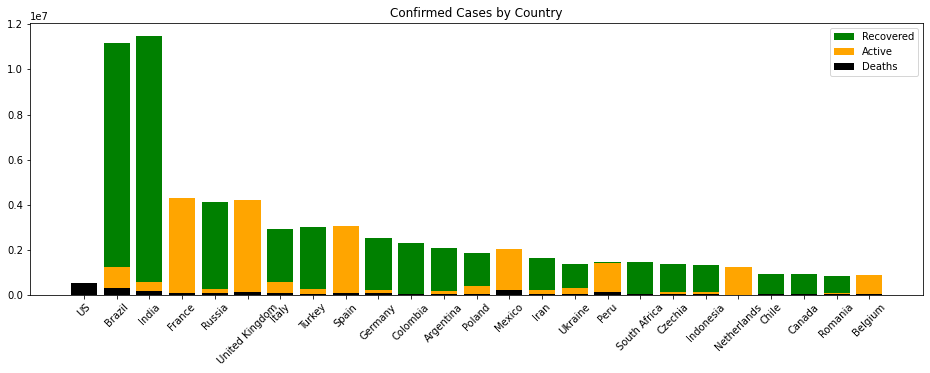

In [29]:
# confirmed, recovered, active, deaths attribute
values = cases_location.groupby('Country_Region').sum()
values = values.nlargest(25, 'Confirmed')

plt.figure(figsize=(16,5))
plt.bar(values.index, values['Recovered'], color='green')
plt.bar(values.index, values['Active'], color='orange')
plt.bar(values.index, values['Deaths'],  color='black')
plt.xticks(rotation=45)
plt.legend(['Recovered', 'Active', 'Deaths'])
plt.title('Confirmed Cases by Country')
plt.show()

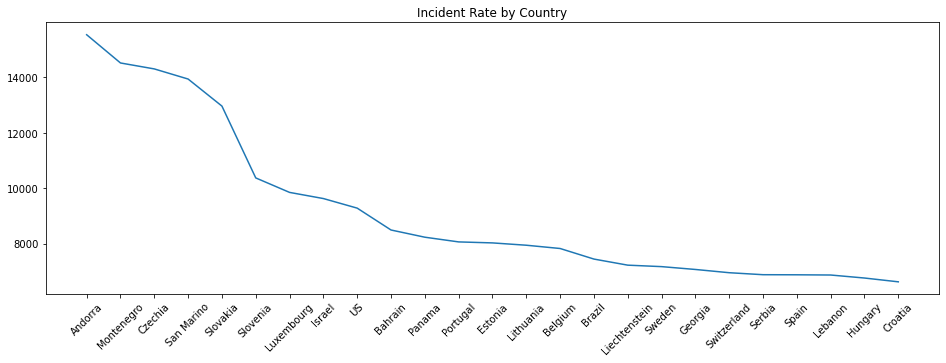

In [30]:
# incident rate attribute
values = cases_location.groupby('Country_Region').mean()
values = values.nlargest(25, 'Incident_Rate')

plt.figure(figsize=(16,5))
plt.plot(values.index, values['Incident_Rate'])
plt.xticks(rotation=45)
plt.title('Incident Rate by Country')
plt.show()

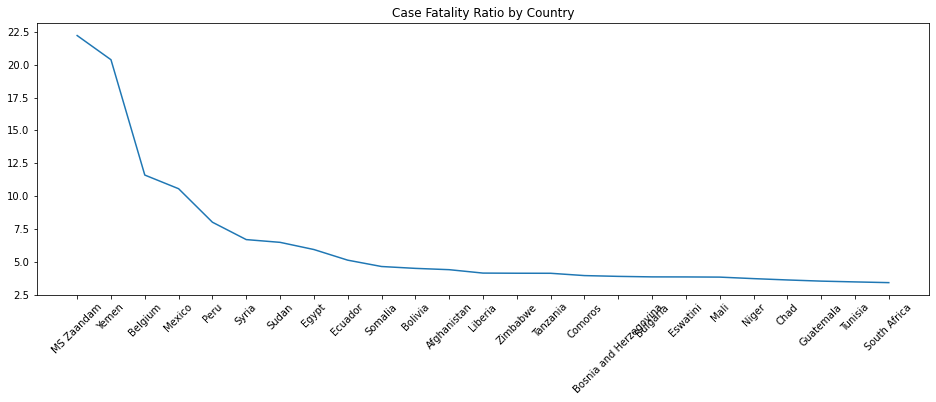

In [31]:
# case_fatality attribute
values = cases_location.groupby('Country_Region').mean()
values = values.nlargest(25, 'Case_Fatality_Ratio')

plt.figure(figsize=(16,5))
plt.plot(values.index, values['Case_Fatality_Ratio'])
plt.xticks(rotation=45)
plt.title('Case Fatality Ratio by Country')
plt.show()

## 1.4 Data Cleaning and Imputing Missing Values
Datasets involved: cases_2021_train.csv, cases_2021_test.csv, location_2021.csv

In [ ]:
# Primary: age column -> remove all entries that are NaN
# format age to standard integer
# potential approaches: 

# other columns -> impute, what strategies can we use to impute missing values of different columns
# additional information: best action is replace NaN with ""

In [24]:
# Removing NaN's from age column in train and test datasets

cases_train = cases_train[cases_train['age'].notna()].reset_index()
cases_test = cases_test[cases_test['age'].notna()].reset_index()


In [50]:
age_range = cases_train[cases_train['age'].str.contains('-') == True].reset_index(drop=True)

In [57]:
age_range.iloc[0]['age']

'22-80'

In [77]:
# age range greater than 10 should be removed?

def range_to_num(age):
    range = 10

    a_list = age.split('-')
    map_ints = map(float, a_list)
    map_list = list(map_ints)

    if (len(map_list) == 1):
        return round(map_list[0])

    if ((map_list[1] - map_list[0]) > range):
        return 'remove'
    else:
        return round((map_list[1] + map_list[0]) / 2)


In [67]:
cases_train = cases_train.drop(columns=['index'])
cases_test = cases_test.drop(columns=['index'])

In [ ]:
# STEPS TO CLEAN VALUES IN AGE COLUMN
#1. Format all values with 'x-x' range to a single int value or 'remove'
#2. Remove all entries labelled 'remove' 
#3. Convert all column entries to int
#4. Use round() on all values to get rid of 0.3, 0.5, 0.8 values -> some babies

In [85]:
# Cleaning train dataset - age

cases_train['age'] = cases_train['age'].apply(lambda x: range_to_num(x))
cases_train = cases_train[cases_train['age'] != 'remove']
cases_train['age'] = pd.to_numeric(cases_train['age'])
cases_train['age'] = cases_train['age'].apply(lambda x: round(x))

In [ ]:
# Cleaning test dataset - age

cases_test['age'] = cases_test['age'].apply(lambda x: range_to_num(x))
cases_test = cases_test[cases_test['age'] != 'remove']
cases_test['age'] = pd.to_numeric(cases_test['age'])
cases_test['age'] = cases_test['age'].apply(lambda x: round(x))

In [ ]:
# sex	province	country	latitude	longitude	date_confirmation	additional_information	source	chronic_disease_binary	outcome_group
# sex: NaN convert to 'unknown'
# province: can use latitude and longitude to get province -> need to find appropriate dataset / function to determine geographical location
# country: has no NaN values -> is okay
# date_confirmation: some NaN values -> think its okay to keep these entries -> convert NaN's to 'unknown'
# additional_information: some NaN values -> convert to 'unknown'
# source: some NaN values -> convert to 'unknown'
# chronic_disease_binary: no NaN values
# outcome_group: no NaN values



In [103]:
cases_train[cases_train['outcome_group'].isna()]

,age,sex,province,country,latitude,longitude,date_confirmation,additional_information,source,chronic_disease_binary,outcome_group


## 1.5 Dealing with outliers
Datasets involved: cases_2021_train.csv, cases_2021_test.csv, location_2021.csv